Question 1

Create a pie chart which shows the Proportion Of Male/female passengers.

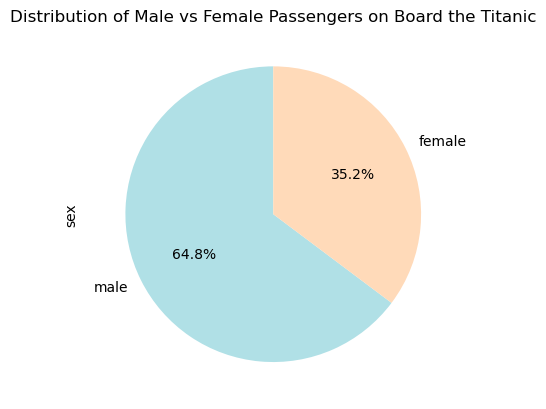

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

gender_counts = titanic['sex'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#B0E0E6', '#FFDAB9'], startangle=90)

plt.title('Distribution of Male vs Female Passengers on Board the Titanic')

plt.show()

Question 2

Create a pie chart which shows the proportion passengers in each class (1,2,3).

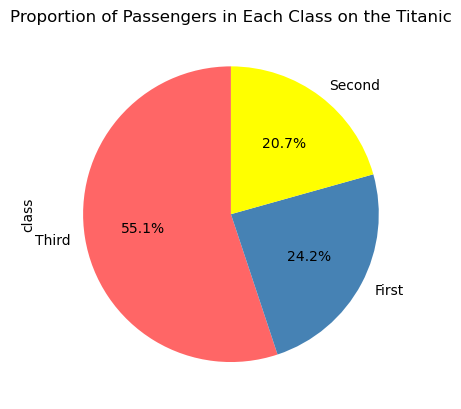

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

class_counts = titanic['class'].value_counts()

class_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FF6666', '#4682B4', '#FFFF00'], startangle=90)

plt.title('Proportion of Passengers in Each Class on the Titanic')

plt.show()

Question 3

Explain the relationship between age and fare using a visualisation.

The below scatter graph shows the correlation between age and fare paid to board the titanic. This shows that the data is relatively widely spread and passengers of all ages paid all fares.

As there is no obvious trend, I also tried a line of best fit and removed values where they had empty responses. This further proved my point as the line is relatively flat indicating there is no direct relationship. However, the line does have a somewhat positive correlation, indicating that the older the passenger, the more they paid for their ticket to board the titanic, but this is only a slight correlation.

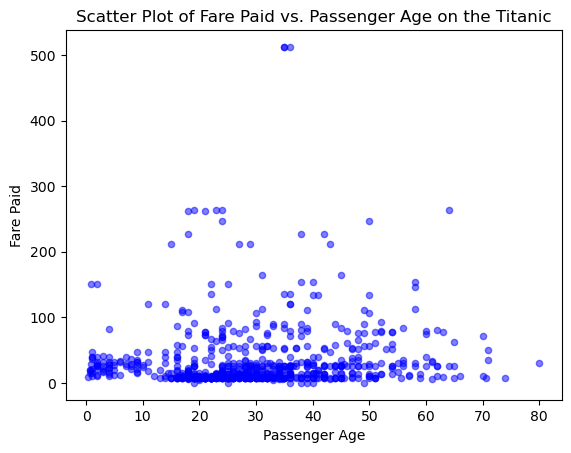

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

titanic.plot(kind='scatter', x='age', y='fare', alpha=0.5, color='blue')

plt.xlabel('Passenger Age')
plt.ylabel('Fare Paid')
plt.title('Scatter Plot of Fare Paid vs. Passenger Age on the Titanic')

plt.show()

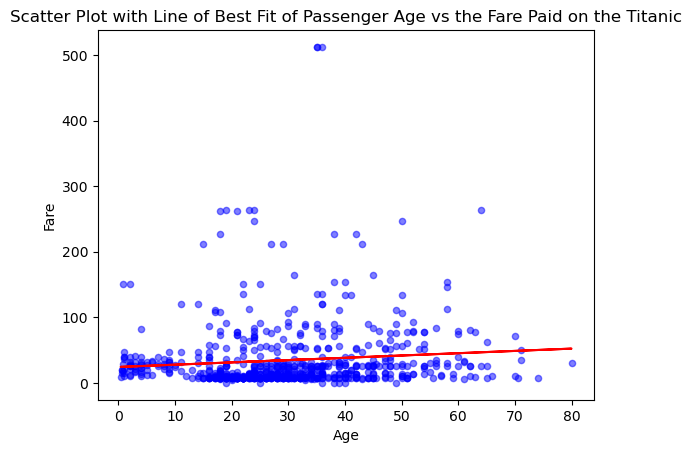

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

titanic_cleaned = titanic.dropna(subset=['age', 'fare'])

ax = titanic_cleaned.plot(kind='scatter', x='age', y='fare', alpha=0.5, color='blue')

fit = np.polyfit(titanic_cleaned['age'], titanic_cleaned['fare'], 1)
regression_line = np.poly1d(fit)

ax.plot(titanic_cleaned['age'], regression_line(titanic_cleaned['age']), color='red')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot with Line of Best Fit of Passenger Age vs the Fare Paid on the Titanic')

plt.show()

Question 4

What's The Survival Rate By Age,sex,and class?

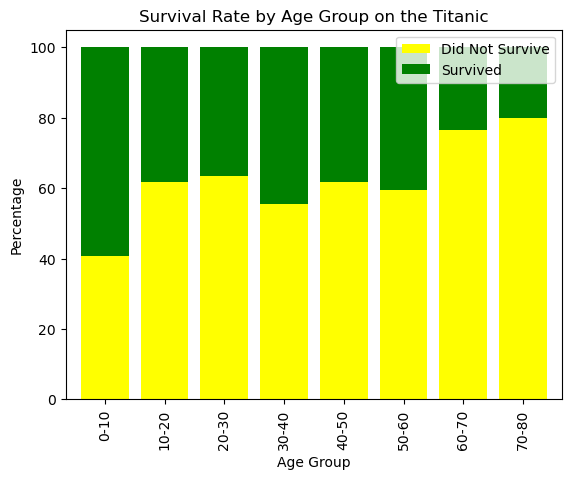

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

titanic['age_group'] = pd.cut(titanic['age'], bins=age_bins, labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

age_group_counts = titanic.groupby(['age_group', 'survived']).size().unstack()

age_group_rates = age_group_counts.div(age_group_counts.sum(axis=1), axis=0) * 100

ax = age_group_rates.plot(kind='bar', stacked=True, color=['yellow', 'green'], width=0.8)

plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Survival Rate by Age Group on the Titanic')

ax.legend(['Did Not Survive', 'Survived'], loc='upper right')

plt.show()

The age group with the highest survival rate on the titanic was the 0-10 age group, which makes sense as women and children were prioritised when evacuating via lifeboats. Then the age group with the lowest survival rate was the 70-80 age group, which is may be due to older passengers becoming more susceptible to the cold conditions/having other preexisting conditions in old age that made it more difficult for them to survive under streneous conditions. 

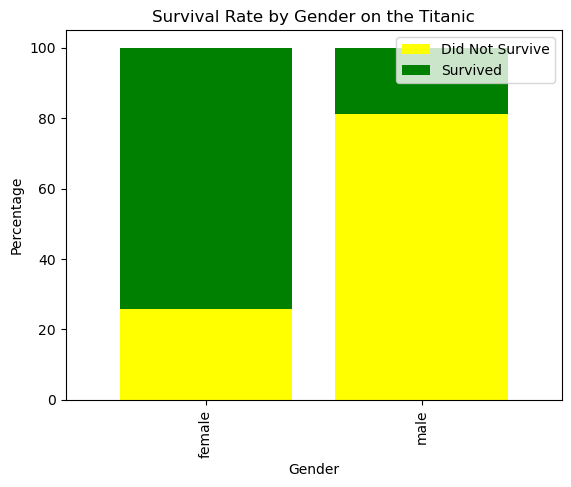

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

gender_survival_counts = titanic.groupby(['sex', 'survived']).size().unstack()

gender_survival_rates = gender_survival_counts.div(gender_survival_counts.sum(axis=1), axis=0) * 100

ax = gender_survival_rates.plot(kind='bar', stacked=True, color=['yellow', 'green'], width=0.8)

plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Survival Rate by Gender on the Titanic')

ax.legend(['Did Not Survive', 'Survived'], loc='upper right')

plt.show()

Females had a significantly higher survival rate than males. This is because on board they prioritised women and children in the evacuation so more women were able to evacuate by lifeboat which greatly increased their chances of survival. 

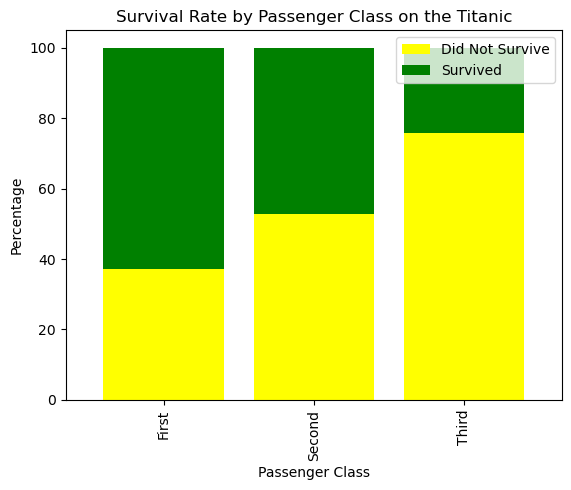

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

class_counts = titanic.groupby(['class', 'survived']).size().unstack()

class_rates = class_counts.div(class_counts.sum(axis=1), axis=0) * 100

ax = class_rates.plot(kind='bar', stacked=True, color=['yellow', 'green'], width=0.8)

plt.xlabel('Passenger Class')
plt.ylabel('Percentage')
plt.title('Survival Rate by Passenger Class on the Titanic')

ax.legend(['Did Not Survive', 'Survived'], loc='upper right')

plt.show()

As would be expected, the highest survival rate, was of those in first class, and lowest survival rate was of those in third class. This is likely due to two reasons:

1. The third class passengers were kept at the bottom of the ship and as the ship filled with water, this is where the first passengers would begin drowning.
2. In evacuation via lifeboats, first class passngers were given priority and so on, so the third class passengers were in the msot part unable to evacuate via lifeboat which could have improved their chances of survival.